In [116]:
import os

# Create images folder if it doesn't exist
os.makedirs("images", exist_ok=True)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [17]:
# Load Data
df = pd.read_excel("Online Retail.xlsx")

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
# Data Cleaning
# Drop nulls
df.dropna(subset=["InvoiceNo", "Description", "CustomerID"], inplace=True)

In [21]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [22]:
# Remove cancelled orders (InvoiceNo starts with "C")
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [23]:
# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [24]:
# Compute revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [25]:
# Remove negative or zero revenue
df = df[df["Revenue"] > 0]

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
# Save cleaned data
df.to_csv("retail_cleaned.csv", index=False)

# 2.Feature Engineering
Group by date to get Daily Revenue and Invoice Count

In [29]:
# Ensure InvoiceDate is datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create a new column for just the date (no time)
df["Date"] = df["InvoiceDate"].dt.date

# Daily revenue
daily_revenue = df.groupby("Date")["Revenue"].sum().reset_index()
daily_revenue.columns = ["Date", "TotalRevenue"]

# Daily invoice count
daily_invoices = df.groupby("Date")["InvoiceNo"].nunique().reset_index()
daily_invoices.columns = ["Date", "InvoiceCount"]

# Merge into one DataFrame
daily_df = pd.merge(daily_revenue, daily_invoices, on="Date")

daily_df.head()


,Date,TotalRevenue,InvoiceCount
0,2010-12-01,46192.49,121
1,2010-12-02,47197.57,137
2,2010-12-03,23876.63,57
3,2010-12-05,31361.28,87
4,2010-12-06,31009.33,94


# Add Time-based Features

In [31]:
# Convert Date column to datetime again for .dt access
daily_df["Date"] = pd.to_datetime(daily_df["Date"])

# Add date features
daily_df["Year"] = daily_df["Date"].dt.year
daily_df["Month"] = daily_df["Date"].dt.month
daily_df["Weekday"] = daily_df["Date"].dt.weekday  # 0 = Monday
daily_df["DayOfYear"] = daily_df["Date"].dt.dayofyear

daily_df.head()

,Date,TotalRevenue,InvoiceCount,Year,Month,Weekday,DayOfYear
0,2010-12-01,46192.49,121,2010,12,2,335
1,2010-12-02,47197.57,137,2010,12,3,336
2,2010-12-03,23876.63,57,2010,12,4,337
3,2010-12-05,31361.28,87,2010,12,6,339
4,2010-12-06,31009.33,94,2010,12,0,340


# Top Country

In [33]:
top_countries = df["Country"].value_counts().nlargest(5).index.tolist()
df_top = df[df["Country"].isin(top_countries)]

In [34]:
df_top.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [35]:
daily_df.to_csv("daily_features.csv", index=False)

In [36]:
# Convert column to datetime if not already
daily_df["Date"] = pd.to_datetime(daily_df["Date"])

In [37]:
# Set as index
daily_df.set_index("Date", inplace=True)

## Let’s Add These Key Features to daily_df:

## 1. Rolling Averages (e.g., 3-day, 7-day)
These help smooth out fluctuations and capture short-term momemtum

In [40]:
daily_df["Revenue_MA3"] = daily_df["TotalRevenue"].rolling(window=3).mean()
daily_df["Revenue_MA7"] = daily_df["TotalRevenue"].rolling(window=7).mean()

## 2. Lag Features (Yesterday’s Revenue, 2 Days Ago)
These help the model understand that today’s revenue is often related to yesterday's.

In [42]:
daily_df["Revenue_Lag1"] = daily_df["TotalRevenue"].shift(1)
daily_df["Revenue_Lag2"] = daily_df["TotalRevenue"].shift(2)

## 3. Holiday Flag (UK Holidays or Manual)
If you don’t have a calendar API or external file, you can manually tag key dates:

In [44]:
# Sample: Manually define some holidays (use real dates if available)
uk_holidays = ["2010-12-25", "2011-01-01"]  # Add more real holiday dates here
daily_df["IsHoliday"] = daily_df.index.strftime('%Y-%m-%d').isin(uk_holidays).astype(int)

## 4. End-of-Month Flag
Sales often spike at month-end due to reporting, inventory, or payroll cycles.

In [46]:
# Resample to monthly totals (ME = Month End)
monthly_df = daily_df.resample("ME").sum()

## 5. Weekday & Month Dummies (already there, but let’s make them one-hot encoded if needed)

In [48]:
# Optional: one-hot encode
daily_df = pd.get_dummies(daily_df, columns=["Weekday", "Month"], drop_first=True)

# Visualization
Tme Series Plots(EDAon Daily Data)

## Daily Revenue Over Time

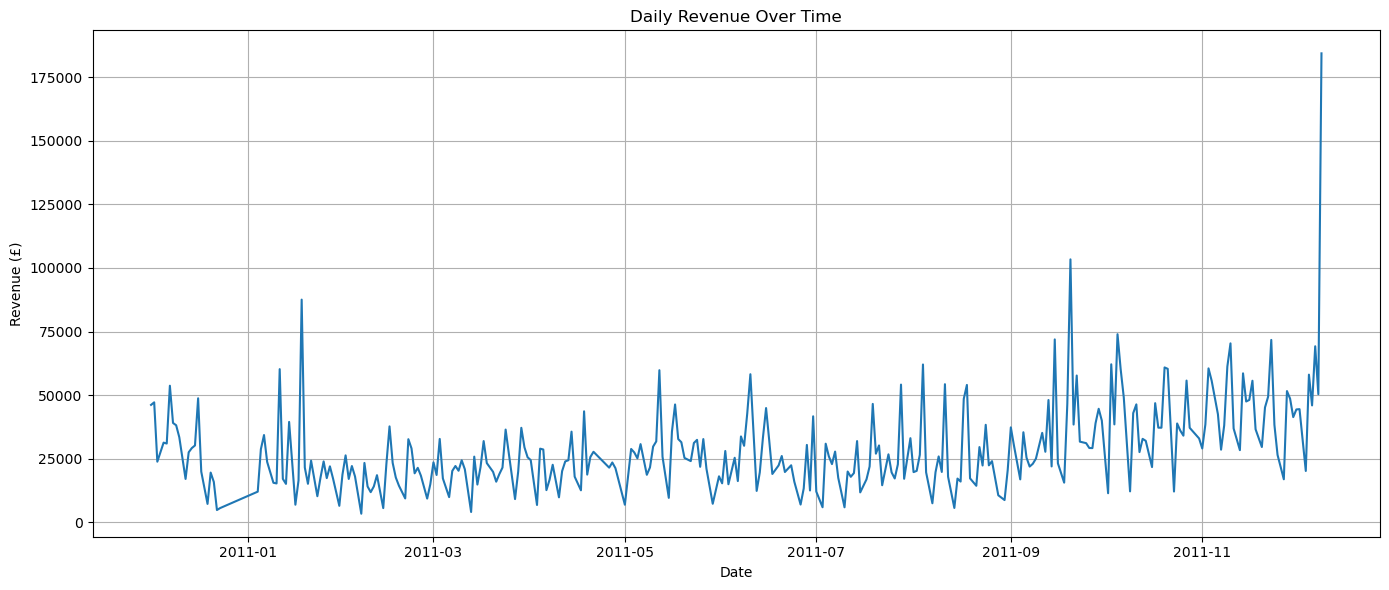

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(daily_df.index, daily_df["TotalRevenue"], label="Daily Revenue")
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
plt.savefig("images/revenue_over_time.png", dpi=300)

<Figure size 640x480 with 0 Axes>

## Revenue by Weekday

In [91]:
print(daily_df.columns)

Index(['TotalRevenue', 'InvoiceCount', 'Year', 'DayOfYear', 'Revenue_MA3',
       'Revenue_MA7', 'Revenue_Lag1', 'Revenue_Lag2', 'IsHoliday', 'Weekday_1',
       'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_6', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')


## Rebuild Date from index, then plot

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Step 1: Recreate the 'Date' column from index
daily_df = daily_df.copy()
daily_df['Date'] = daily_df.index

# Step 2: Make sure 'Date' is datetime type
daily_df['Date'] = pd.to_datetime(daily_df['Date'])

# Step 3: Extract weekday info
daily_df['Weekday'] = daily_df['Date'].dt.weekday  # 0 = Monday
daily_df['WeekdayName'] = daily_df['Date'].dt.day_name()

# Optional: Check columns
print(daily_df[['Date', 'Weekday', 'WeekdayName']].head())


                 Date  Weekday WeekdayName
Date                                      
2010-12-01 2010-12-01        2   Wednesday
2010-12-02 2010-12-02        3    Thursday
2010-12-03 2010-12-03        4      Friday
2010-12-05 2010-12-05        6      Sunday
2010-12-06 2010-12-06        0      Monday


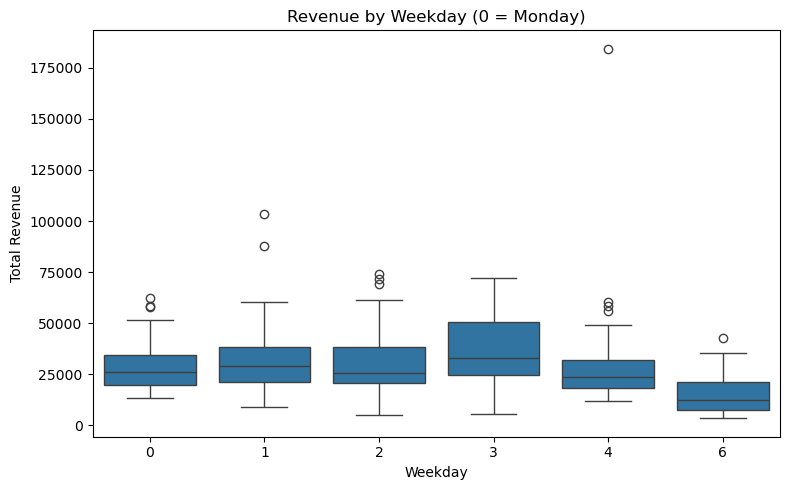

In [130]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Weekday", y="TotalRevenue", data=daily_df)
plt.title("Revenue by Weekday (0 = Monday)")
plt.xlabel("Weekday")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("images/revenue_by_weekday.png", dpi=300)
plt.show()

## Monthly Revenue Trend

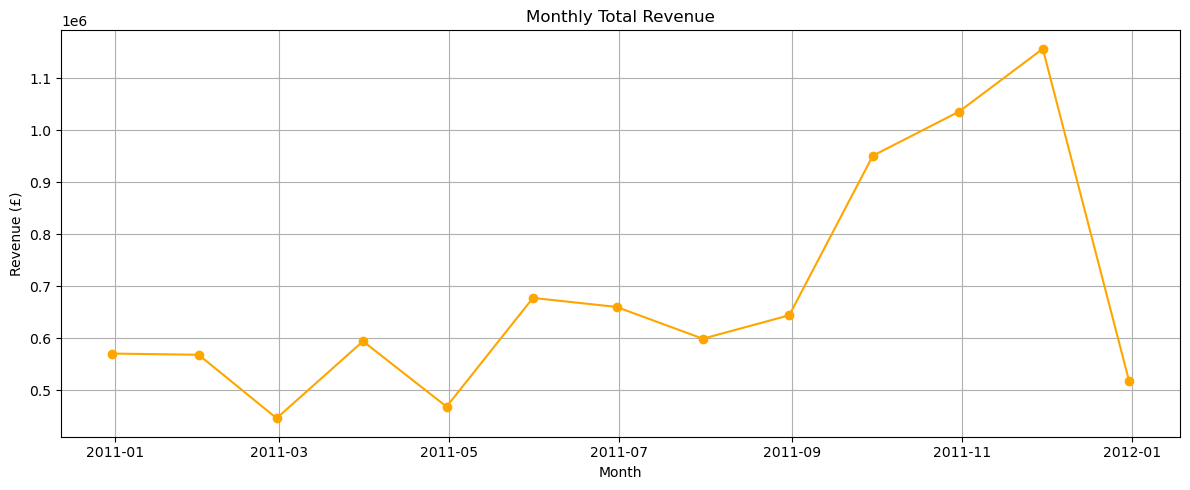

In [132]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_df.index, monthly_df["TotalRevenue"], marker="o", color="orange")
plt.title("Monthly Total Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.tight_layout()

plt.savefig("images/monthly_revenue_trend.png", dpi=300)
plt.show()

## Seasonal Decomposition

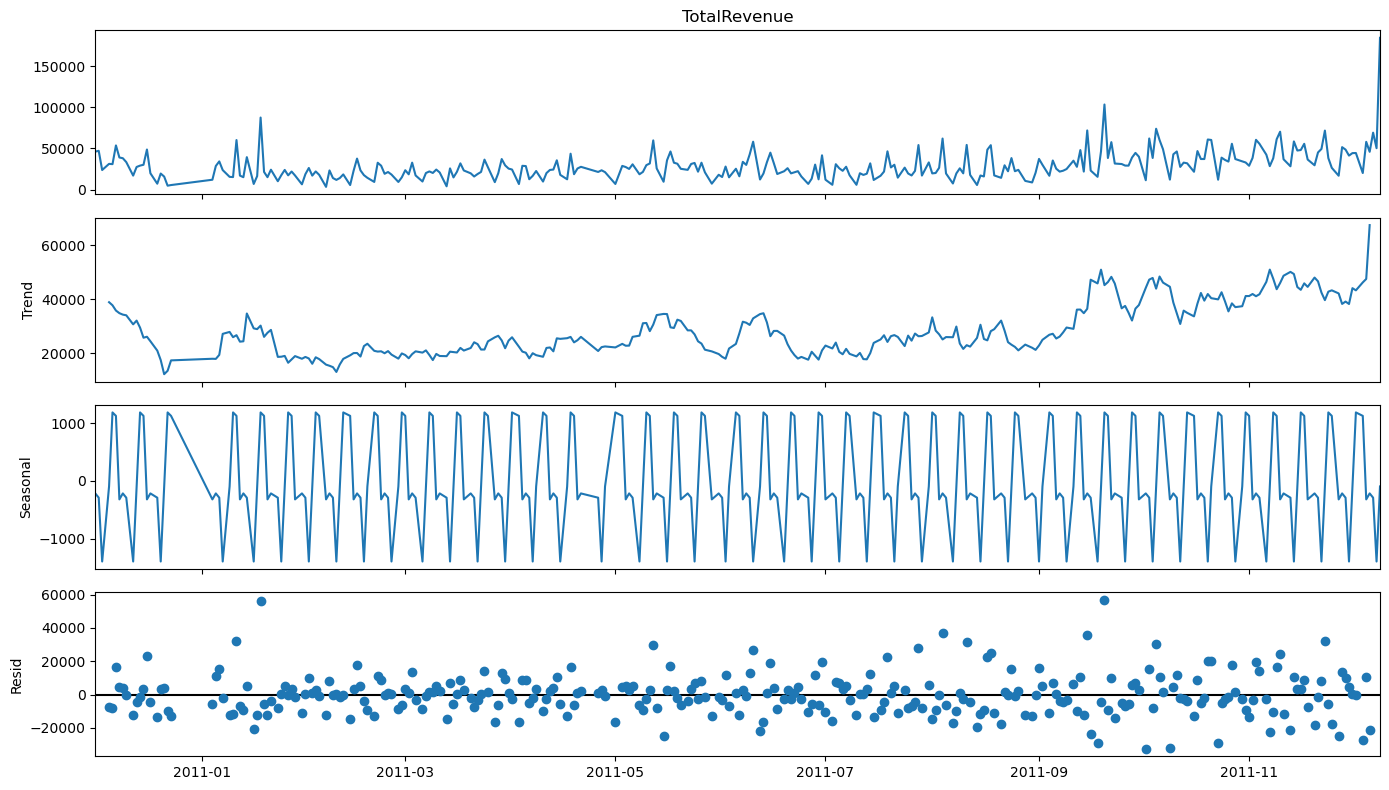

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_df["TotalRevenue"], model="additive", period=7)

fig = result.plot()
fig.set_size_inches(14, 8)
plt.tight_layout()
plt.show()


In [61]:
y = np.log1p(daily_df["TotalRevenue"])  # log(1 + x) is safer for 0s
X = daily_df.drop(columns=["TotalRevenue"])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Separate features and target
X = daily_df.drop(columns=["TotalRevenue"])
y = daily_df["TotalRevenue"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

## Define Features and Target
  Note: We use shuffle=False to preserve the time series order.

#  Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("📊 Linear Regression")
print(f"MAE:  {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.4f}")


📊 Linear Regression
MAE:  5555.98
RMSE: 6231.09
R²:   0.9278


# Ridge Regression (with regularization)

In [70]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n📊 Ridge Regression")
print(f"MAE:  {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²:   {r2_ridge:.4f}")



📊 Ridge Regression
MAE:  1881.92
RMSE: 2881.33
R²:   0.9846


# XGBoost Regression (non-linear + tree-based)

In [73]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [93]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Recreate the model and fit it
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbosity=1  # optional: change to 0 for silent mode
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("📈 XGBoost Regression Performance:")
print(f"✅ MAE:  {mae_xgb:.2f}")
print(f"✅ RMSE: {rmse_xgb:.2f}")
print(f"✅ R²:   {r2_xgb:.4f}")

# Show a few predictions for confirmation
print("\n🔍 Sample Predictions:", y_pred_xgb[:5])


📈 XGBoost Regression Performance:
✅ MAE:  12798.51
✅ RMSE: 24139.30
✅ R²:   -0.0836

🔍 Sample Predictions: [33868.777 17671.564 39390.72  65961.26  54296.504]


In [95]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb = np.expm1(y_pred_xgb)  # Invert log1p
y_test_orig = np.expm1(y_test)     # Invert true values for comparison


C:\Users\Eugene\AppData\Local\Temp\ipykernel_29932\3973112099.py:2: RuntimeWarning: overflow encountered in expm1
  y_pred_xgb = np.expm1(y_pred_xgb)  # Invert log1p
C:\Users\Eugene\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


# 1. Predicted vs Actual Plot (XGBoost)

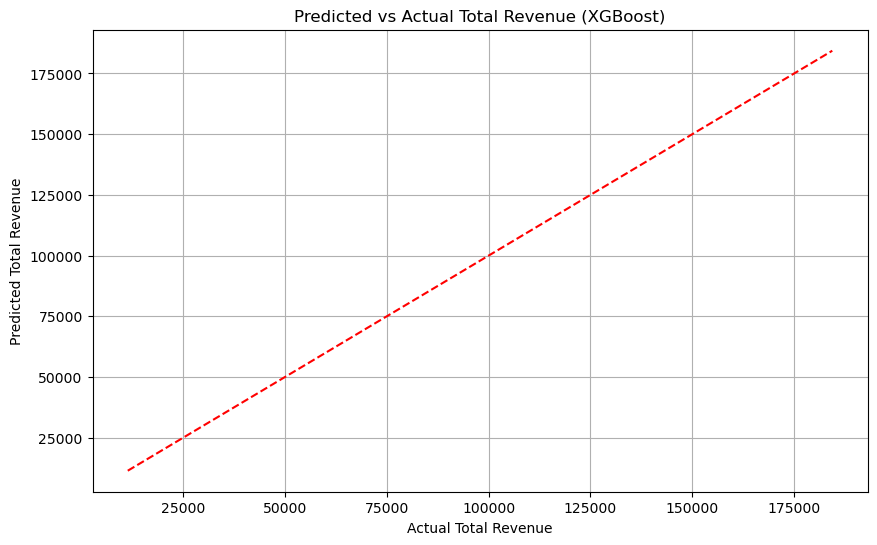

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Total Revenue")
plt.ylabel("Predicted Total Revenue")
plt.title("Predicted vs Actual Total Revenue (XGBoost)")
plt.grid(True)

plt.savefig("images/predictions_vs_actuals.png", dpi=300)
plt.show()

## 2.Residual Plot

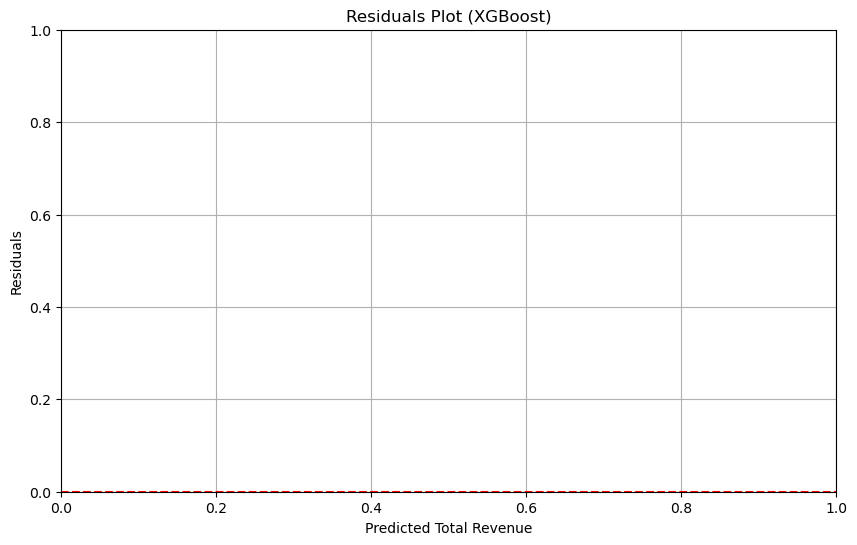

In [136]:
# Calculate residuals
residuals = y_test - y_pred_xgb

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals, color="green", alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Total Revenue")
plt.ylabel("Residuals")
plt.title("Residuals Plot (XGBoost)")
plt.grid(True)

plt.savefig("images/residuals_plot.png", dpi=300)
plt.show()


## 3.Feature Importance (Only for XGBoost)

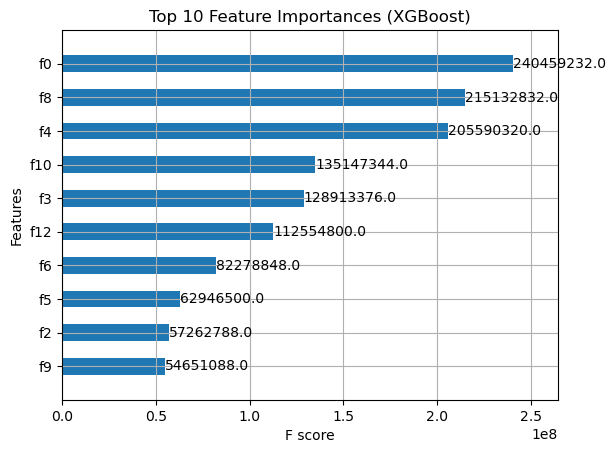

In [138]:
import xgboost as xgb
import pandas as pd

# Assuming your XGBoost model is stored in xgb_model and your features in X.columns
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.grid(True)

plt.savefig("images/feature_importance.png", dpi=300)
plt.show()


## Compare Model Performance

In [107]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["Linear", "Ridge", "XGBoost"],
    "MAE": [mae_lr, mae_ridge, mae_xgb],
    "RMSE": [rmse_lr, rmse_ridge, rmse_xgb],
    "R²": [r2_lr, r2_ridge, r2_xgb]
})

results_df.sort_values("RMSE")

,Model,MAE,RMSE,R²
1,Ridge,1881.922400,2881.331437,0.984561
0,Linear,5555.975398,6231.092958,0.927795
2,XGBoost,12798.511077,24139.304715,-0.083644


In [140]:
import os
os.makedirs("images", exist_ok=True)


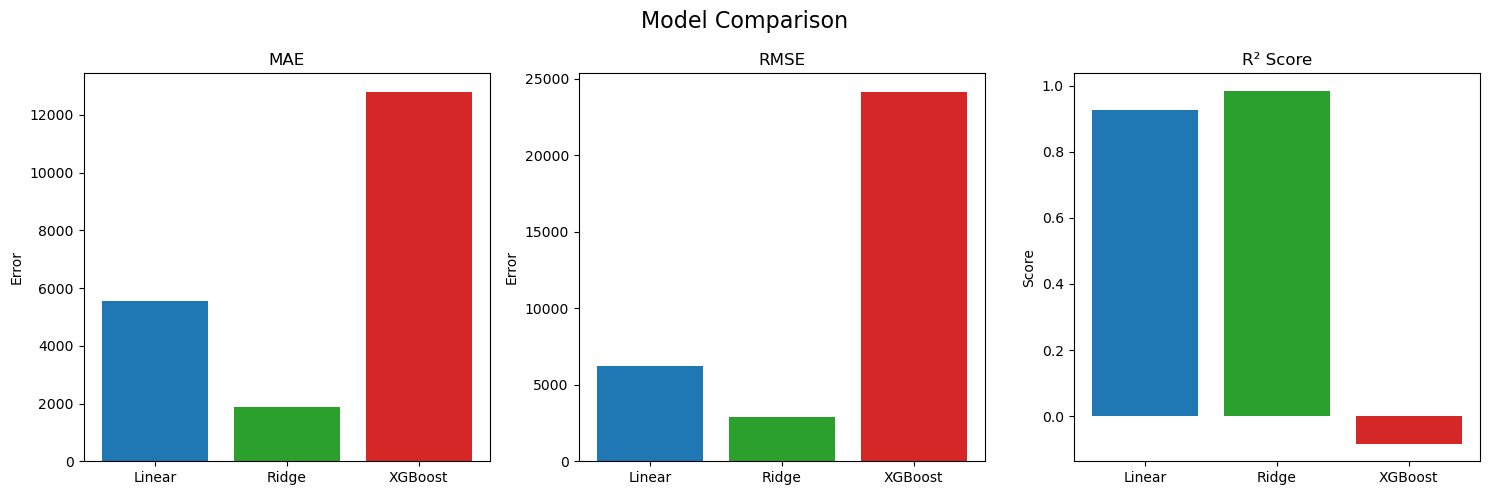

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure 'images/' folder exists
os.makedirs("images", exist_ok=True)

# Evaluation results
data = {
    "Model": ["Linear", "Ridge", "XGBoost"],
    "MAE": [5555.98, 1881.92, 12798.51],
    "RMSE": [6231.09, 2881.33, 24139.30],
    "R2": [0.9278, 0.9846, -0.0836]
}

df = pd.DataFrame(data)

# Plot configuration
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors = ["#1f77b4", "#2ca02c", "#d62728"]

# MAE Plot
ax[0].bar(df["Model"], df["MAE"], color=colors)
ax[0].set_title("MAE")
ax[0].set_ylabel("Error")

# RMSE Plot
ax[1].bar(df["Model"], df["RMSE"], color=colors)
ax[1].set_title("RMSE")
ax[1].set_ylabel("Error")

# R² Plot
ax[2].bar(df["Model"], df["R2"], color=colors)
ax[2].set_title("R² Score")
ax[2].set_ylabel("Score")

fig.suptitle("Model Comparison", fontsize=16)
plt.tight_layout()

# Save to file
plt.savefig("images/model_comparison.png", dpi=300)
plt.show()
